# Analise de dados marketing
Analise desenvolvida em cima de uma base de dados de campanha de marketing, utilizando pandas, numpy e  matplotlib.
Fonte: https://mavenanalytics.io/data-playground?dataStructure=Single%20table&order=date_added%2Cdesc&page=5&pageSize=5

## Configurações iniciais

In [3]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [4]:
# Configurando parâmetros das bibliotecas
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

## Trazendo dataset e fazendo verificações inicias
Verificado que o dataset utiliza separador padrão "," portando não será necessário utilizar o parâmetro sep no momento de fazer a importação.

In [6]:
# Armazenando dataset em variável
df = pd.read_csv('./Dataset/marketing_data.csv')
# Exibindo dataset
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain


In [7]:
# Verificando informações os campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

___
Verificado que o campo de data do registro do cliente `Dt_Customer` está com o formato incorreto. Em relação aos valores nulos aparentemente a apenas a coluna `Income` apresenta alguns registros, serão verificados mais afundo as outras colunas mais adiante.

## Tratamento dos dados

In [11]:
# Ajustando formato da data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%Y-%m-%d', errors = 'coerce')

In [12]:
# Criando mascara dos valores nulos
mask = df[' Income '].isna()
# visualizando dados
df[mask]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,Germany
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,USA
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,Australia
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,Australia
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,Canada
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,Germany
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,USA
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,Germany
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,Australia
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,Australia


In [13]:
# Verificando dados estatísticos da coluna Income
df[' Income '].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name:  Income , dtype: float64

___
Vamos preencher os valores nulos com a média

In [15]:
# Substituindo valores com a média
df[' Income '].fillna(df[' Income '].mean(), inplace = True)

In [16]:
# Criando coluna de ano
df['Year_Registration'] = df['Dt_Customer'].dt.strftime('%Y')

In [17]:
# Criando coluna de mês
df['Month_Registration'] = df['Dt_Customer'].dt.strftime('%m')

In [18]:
# Criando coluna com interações resultado das campanhas

In [19]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Year_Registration,Month_Registration
1552,8895,1985,Graduation,Single,70596.0,0,0,2012-10-05,68,347,44,534,17,0,26,1,3,5,12,2,0,0,0,0,0,0,0,Spain,2012,10
1129,7037,1974,PhD,Married,37087.0,1,0,2013-08-11,50,194,55,134,15,0,3,3,4,2,8,6,0,0,0,0,0,0,0,Saudi Arabia,2013,08
1380,9353,1959,Graduation,Single,62450.0,0,1,2014-01-06,61,515,47,267,62,66,38,2,5,5,4,3,0,1,0,0,0,0,0,India,2014,01
2216,7230,1960,PhD,Divorced,50611.0,0,1,2012-10-04,98,459,0,24,6,0,4,6,4,5,7,6,0,1,0,0,0,1,0,USA,2012,10
1261,4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,0,India,2012,09
398,6471,1971,Master,Single,36230.0,1,0,2013-10-17,17,14,2,30,8,2,3,1,2,0,4,5,0,0,0,0,0,0,0,Spain,2013,10
699,2625,1954,2n Cycle,Single,42607.0,0,1,2013-11-17,30,156,29,56,30,32,47,2,3,2,7,3,0,0,0,0,0,0,0,Saudi Arabia,2013,11
613,3267,1963,Master,Together,57288.0,0,1,2014-06-25,27,527,0,21,0,0,60,3,8,1,8,6,0,1,0,0,0,0,0,Canada,2014,06
1660,9246,1985,Master,Together,40101.0,1,0,2012-10-14,73,171,3,129,26,24,62,4,6,1,6,7,0,0,0,0,0,0,0,India,2012,10
897,6919,1978,2n Cycle,Married,26224.0,1,0,2013-06-04,39,4,7,15,13,9,15,3,2,1,3,6,0,0,0,0,0,0,0,Spain,2013,06


## Salvando dataset tratado

In [21]:
df.to_csv('./Dataset/marketing_data_tratado.csv', index = False)

## Análise exploratória

### 1 - Quantos clientes se registraram ao longo dos anos

In [24]:
# Contando os registros por ano
reg_ano = df.groupby('Year_Registration')['ID'].count()
# Exibindo contagem
reg_ano

Year_Registration
2012     494
2013    1189
2014     557
Name: ID, dtype: int64

In [25]:
# Verificando se houveram registros em todos os meses
reg_mes_ano = df.pivot_table(
    index = 'Month_Registration',
    columns = 'Year_Registration',
    values = 'ID',
    aggfunc = 'count'
)
# Exibindo resultado
reg_mes_ano

Year_Registration,2012,2013,2014
Month_Registration,,,
01,NaN,107.0,90.0
02,NaN,100.0,78.0
03,NaN,102.0,109.0
04,NaN,88.0,94.0
05,NaN,104.0,112.0
06,NaN,92.0,74.0
07,2.0,99.0,NaN
08,118.0,104.0,NaN
09,99.0,94.0,NaN


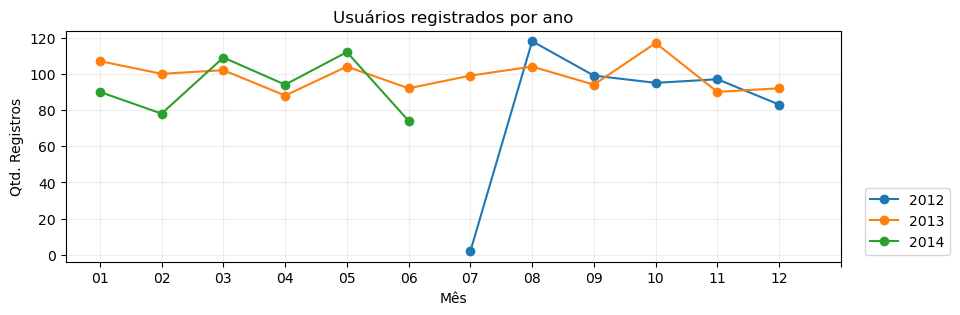

In [26]:
# Plotando gráfico
reg_mes_ano.plot(
    figsize = (10, 3),
    kind = 'line',
    layout = (1, 3),
    legend = True,
    rot = 0,
    xlabel = ('Mês'),
    xticks = (np.arange(0, 13, step = 1)),
    ylabel = ('Qtd. Registros'),
    marker = 'o'
);
plt.title('Usuários registrados por ano')
plt.legend(loc = 'lower right', bbox_to_anchor = (1.15, 0))
plt.grid(True, alpha = 0.22);

___
Nota-se que os registros começaram a ser contabilizados no mês 7 de 2015, e há registros até o mês 6 de 2014

### 2 - Qual tentativa de campanha foi mais efetiva?

In [29]:
# Listando colunas das camapnhas
campanhas = df.columns[df.columns.str.contains('Accepted')].to_list()
# Exibindo lista
campanhas

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2']

In [30]:
# Somando valores das campanhas
per_campanhas = df[campanhas].sum().sort_values() / df.shape[0] * 100
# Exibindo resultado
per_campanhas

AcceptedCmp2    1.339286
AcceptedCmp1    6.428571
AcceptedCmp3    7.276786
AcceptedCmp5    7.276786
AcceptedCmp4    7.455357
dtype: float64

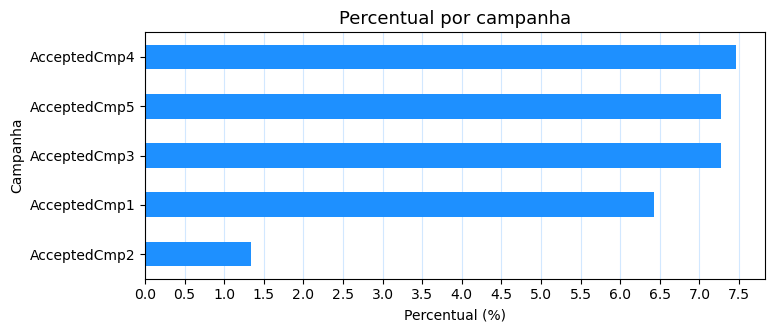

In [31]:
# Plotando gráfico
per_campanhas.plot.barh(
    figsize = (8, 3.2),
    xticks = (np.arange(0, 8, step = 0.5)),
    color = 'dodgerblue'
);
plt.title('Percentual por campanha', fontsize = 13)
plt.xlabel('Percentual (%)')
plt.ylabel('Campanha')
plt.grid(True, axis = 'x', color = 'dodgerblue', alpha = 0.2);

In [32]:
# Verificando o total de conversão que as campanhas conseguiram fazer
round(per_campanhas.sum(), 2)

29.78

### 3 - Quais os países que a campanha 2 surtil menos efeito?

In [34]:
# Filtrando valores
campanha2 = df.query("AcceptedCmp2 == 0").groupby('Country')['ID'].count().sort_values(ascending = False)
# Exibindo resultado
campanha2

Country
Spain           1079
Saudi Arabia     333
Canada           262
Australia        160
India            146
Germany          118
USA              109
Mexico             3
Name: ID, dtype: int64

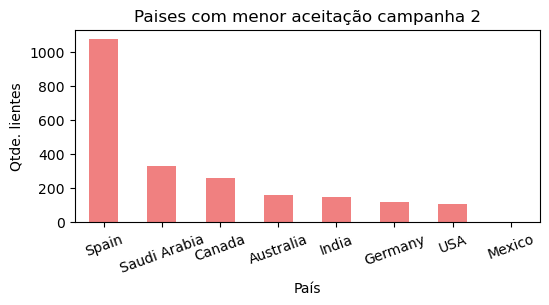

In [35]:
campanha2.plot.bar(
    figsize = (6, 2.5),
    color = 'lightcoral',
    rot = 20,
    title = ('Paises com menor aceitação campanha 2'),
    xlabel = 'País',
    ylabel = 'Qtde. lientes'
);

### 4 - Quais categorias mais compradas?

In [37]:
# Filtrando e listando colunas de compras
compras = df.columns[df.columns.str.contains('Mnt')]
# Exibindo lista
compras

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [38]:
# Somando categorias
venda_cat = df[compras].sum().sort_values()
# Exibindo resultados
venda_cat

MntFruits            58917
MntSweetProducts     60621
MntFishProducts      84057
MntGoldProds         98609
MntMeatProducts     373968
MntWines            680816
dtype: int64

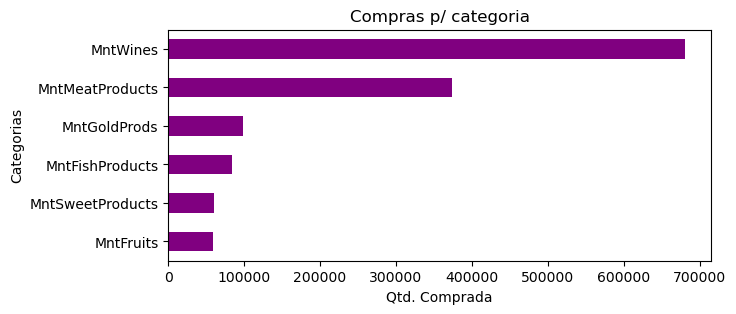

In [39]:
# Plotando gráfico
venda_cat.plot.barh(
    figsize = (7, 3),
    color = 'purple',
    title = ('Compras p/ categoria'),
    ylabel = ('Categorias'),
    xlabel = ('Qtd. Comprada')
);

### 5 - Qual país mais gasta com vinho?

In [41]:
# Filtrando informações
gasto_vinho = df.groupby('Country')['MntWines'].sum().sort_values(ascending = False)
# Exibindo resultado
gasto_vinho

Country
Spain           337991
Saudi Arabia    105918
Canada           84649
Australia        44372
Germany          37483
India            36268
USA              32406
Mexico            1729
Name: MntWines, dtype: int64

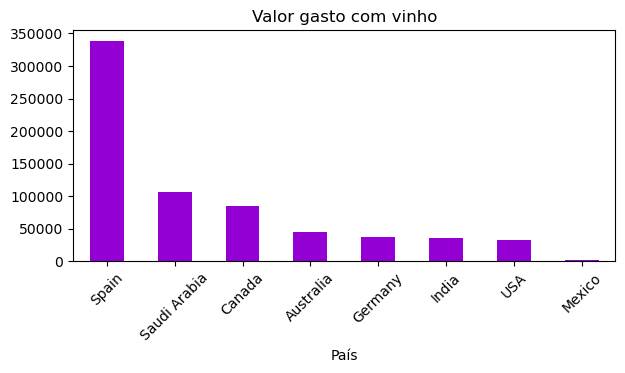

In [42]:
# Plotando gráfico
gasto_vinho.plot(
    figsize = (7, 3),
    color = 'darkviolet',
    kind = 'bar',
    rot = 45,
    xlabel = ('País'),
    title = ('Valor gasto com vinho')
);

### 6 - Qual a relação de visitas ao site com as compras realizadas?

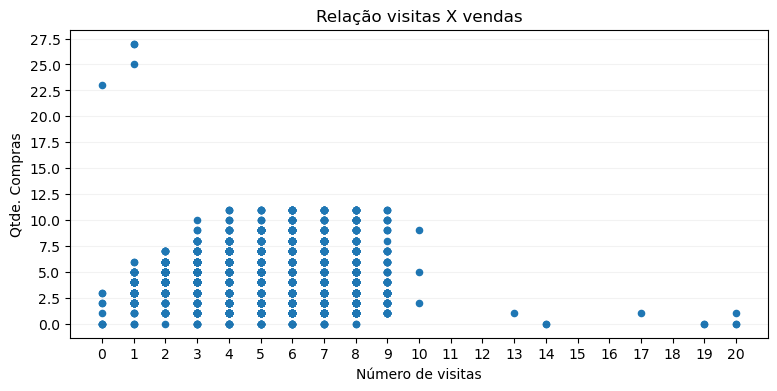

In [44]:
df.plot.scatter(figsize = (9, 4),x = 'NumWebVisitsMonth', y ='NumWebPurchases',
               title = ('Relação visitas X vendas'), xlabel = ('Número de visitas'), ylabel = ('Qtde. Compras'),
               xticks = (np.arange(0, 21, step = 1)),
               yticks = (np.arange(0, 28, step = 2.5))
               );
plt.grid(axis = 'y', color = 'k', alpha = 0.05)

### 7 - Qual percentual dos pedidos teve reclamação?

In [46]:
# Filtrando valores
reclamacao = df['Response'].value_counts()
# Exibindo resultado
reclamacao

Response
0    1906
1     334
Name: count, dtype: int64

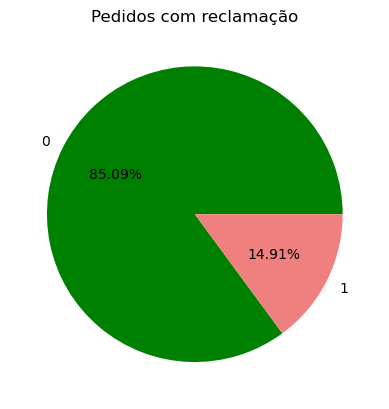

In [47]:
# Plotando gráfico
reclamacao.plot.pie(
    title = ('Pedidos com reclamação'),
    colors = ('green', 'lightcoral'),
    autopct = '%1.2f%%',
    ylabel = (''),
);

### 8 - Quais canais de vendas mais vendem?

In [49]:
# Agrupando colunas das compras em uma lista
compras = df.columns[df.columns.str.contains('Purchases')].to_list()
# Exibindo lista
compras

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [50]:
# Deletando compras com desconto, não vamos considera-lás nas análises
del(compras[0])

In [51]:
# Somando quantidade de comoras
compras_canal = df[compras].sum()
# Exibindo Series
compras_canal

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

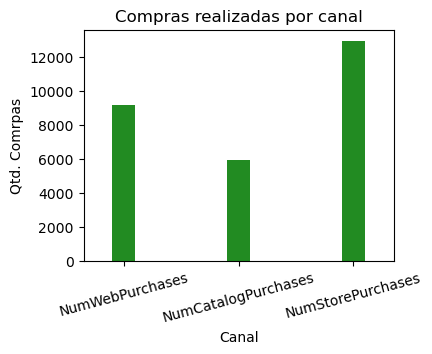

In [52]:
compras_canal.plot.bar(
    figsize = (4, 3),
    title = ('Compras realizadas por canal'),
    width = (0.2),
    xlabel = ('Canal'),
    ylabel = ('Qtd. Comrpas'),
    rot = 15,
    color = ('forestgreen')
);

### 9 - Qual a média de dias da última compra separados por estado civil?

In [54]:
# Verificando informações estatísticas da coluna 'Recency'
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Como a média e a mediana estão com valores próximo, vamos considerar a média para esta análise.

In [56]:
# Calculando a média de dias por estado civil
dias_estado_civil = df.groupby('Marital_Status')['Recency'].mean()
# Exibindo resultado
dias_estado_civil

Marital_Status
Absurd      53.000000
Alone       30.333333
Divorced    49.487069
Married     48.277778
Single      49.506250
Together    50.106897
Widow       49.142857
YOLO         3.000000
Name: Recency, dtype: float64

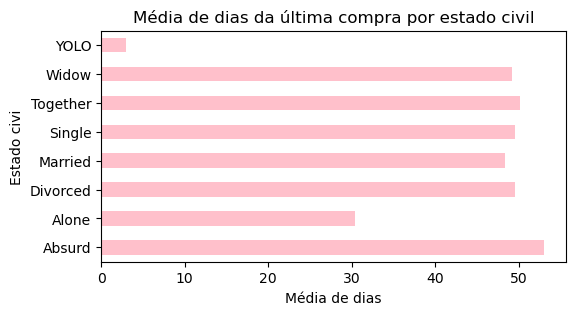

In [57]:
dias_estado_civil.plot.barh(
    figsize = (6, 3),
    title = ('Média de dias da última compra por estado civil'),
    xlabel = ('Média de dias'),
    ylabel = ('Estado civi'),
    color = ('pink')
);

In [58]:
# Verificando quantos registros para o Marital Status 'YOLO' e 'Alone existem'
df.query("Marital_Status == 'YOLO' | Marital_Status == 'Alone'")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Year_Registration,Month_Registration
103,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,Canada,2012,10
104,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,1,0,India,2012,10
286,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0,Canada,2014,05
838,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,1,0,Canada,2014,05
959,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0,Canada,2013,03


### 10 - Quantos clientes não tem crianças e jovens em casa, separados por tipo de fomração?

In [60]:
# Filtrando pessoas sem crianças e jovens em casa
sem_filhos = df.query('Kidhome == 0 & Teenhome == 0').groupby('Education')['ID'].count()
# Exibindo resultado
sem_filhos

Education
2n Cycle       64
Basic          17
Graduation    321
Master        102
PhD           134
Name: ID, dtype: int64

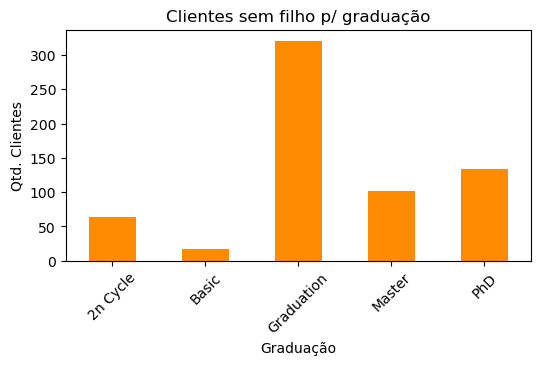

In [61]:
# Plotando grafico
sem_filhos.plot.bar(
    figsize = (6, 3),
    color = ('darkorange'),
    title = ('Clientes sem filho p/ graduação'),
    ylabel = ('Qtd. Clientes'),
    xlabel= ('Graduação'),
    rot = 45,
);

In [62]:
# Verificando o percentual de pessoas sem filho do total de cliente
round(sem_filhos.sum() / df.shape[0] * 100, 2)

28.48

In [63]:
df.shape

(2240, 30)

## Conclusões

 * O ano de **2014** que possui registro em todos os meses, tem comportamento mais estável em relação aos outros dois anos, não apresentando muita variação no registro ao longo dos anos.
 * As campanhas não apresentaram muita variação, exetuando-se a campanha 2 que foi a menos efetiva, convertendo apenas **1,34%** da base estudada. Todas as campanhas totalizam um percentual de conversão de **29,78%**.
 * A campanha 2 não surtil efeito principalmente no país **Spain** Que corresponde a quase **50%** dos registros, e também é o país que mais consome vinho.
 * O vinho é a categoria mais consumida.
 * Pessoas que visitam o site de **3 à 9 vezes**, chegam a fazer até **10 compras** e as que visitam o site mais de 11 vezes, realizam uma ou nenhuma compra, pode ser desdobrado algum tipo de pesquisa, pra verificar se há algum motivo especifíco que às faz não comprar nesse intervalo.
 * Quase **15%** dos pedidos tiveram reclamções registradas.
 * As compras em **loja física** se destacam, sendo seguidar pelas compras via werb e catálogo.
 * As pessoas ficam em média **49 dias** sem comprar.
 * **28,48%** dos clientes não possuem crianças e jovens em casa.